In [1]:
# download csv logfile

from paramiko import SSHClient,AutoAddPolicy
from scp import SCPClient

HOST = "169.254.25.21"
PORT = "22"
USER = "robot"
PSWD = "maker"

ssh = SSHClient()
ssh.set_missing_host_key_policy(AutoAddPolicy())
ssh.connect(HOST, port=PORT, username=USER, password=PSWD)

scp = SCPClient(ssh.get_transport())

In [2]:
import pandas as pd

FILE_ID = "20190305033820" # ここに `Start time is <ID>` の<ID>を入れる
FILE_NAME = "log_%s_runner.csv" % FILE_ID

scp.get("/home/robot/src/log/%s" % FILE_NAME)

In [3]:
# =======================================================
# 表の出力
df = pd.read_csv("./%s" % FILE_NAME, encoding="UTF-8")
df

,id,時刻(sec),処理時間(sec),ジャイロ角速度生値(deg/sec),モーター角度生値(deg),ジャイロ推定角度(rad),ジャイロ推定角速度(rad/sec),モーター角度誤差(rad),モーター角速度誤差(rad/sec),モーター角度誤差累積値(rad??),モーターデューティー比左,モーターデューティー比右,モーター電圧生値,推定最大入力可能電圧左,推定最大入力可能電圧右,モーター印加電圧比左,モーター印加電圧比右
0,0,0.021375,0.021296,20,0.0,0.008491,0.339641,0.000000,0.000000,0.000000,18.321945,20.290965,8259200,9.268696,8.369269,18.321945,20.290965
1,1,0.040326,0.013527,10,0.5,0.012618,0.165097,0.017218,0.378789,0.000430,22.554594,24.980833,8153600,9.142197,8.254270,22.554594,24.980833
2,2,0.058892,0.014876,-18,3.5,0.004528,-0.323601,0.073705,1.242721,0.002273,10.070058,11.153065,8178333,9.171825,8.281205,10.070058,11.153065
3,3,0.076013,0.013374,-39,8.0,-0.012724,-0.690109,0.144155,1.549896,0.005877,-14.879982,-16.479465,8234133,9.238668,8.341971,-14.879982,-16.479465
4,4,0.092421,0.012349,-34,9.0,-0.027795,-0.602820,0.144355,0.004412,0.009486,-45.649143,-50.556894,8215733,9.216627,8.321933,-45.649143,-50.556894
5,5,0.109248,0.013494,-20,6.0,-0.036756,-0.358454,0.076925,-1.483468,0.011409,-66.236445,-73.365228,8099466,9.077350,8.195318,-66.236445,-73.365228
6,6,0.126471,0.014122,0,-2.5,-0.036991,-0.009377,-0.080389,-3.460916,0.009399,-81.663145,-90.469134,7900800,8.839368,7.978971,-81.663145,-90.469134
7,7,0.143970,0.014339,79,-17.0,-0.002755,1.369434,-0.333697,-5.572757,0.001057,-29.124045,-32.263434,7937800,8.883691,8.019264,-29.124045,-32.263434
8,8,0.161384,0.014067,161,-35.0,0.067259,2.800559,-0.613620,-6.158315,-0.014284,77.905903,86.274907,8304000,9.322362,8.418056,77.905903,86.274907
9,9,0.178362,0.013390,182,-49.0,0.146434,3.166986,-0.787952,-3.835307,-0.033983,100.000000,100.000000,7702200,8.601465,7.762696,213.047268,236.067308


In [4]:
%matplotlib inline
import numpy as np

# グラフを表示する関数
def show_plot(df, columns, unit, figsize=(16,10), start=0, end=np.inf):
    x_column = "時刻(sec)"
    
    df_plot = df[(df[x_column] >= start) & (df[x_column] <= end)]
    df_max = df_plot.loc[:, columns].max(axis="index").max()
    df_min = df_plot.loc[:, columns].min(axis="index").min()
    time_max = df_plot[x_column].iloc[-1]
    
    yticks_posi = np.arange(0, df_max+1, unit)
    yticks_nega = np.arange(0, df_min-1, -unit)
    yticks = np.concatenate([yticks_posi, yticks_nega])
    
    xticks = np.arange(start, time_max, 0.1)

    df_plot.plot(y=columns,  x=x_column, yticks=yticks, xticks=xticks, figsize=figsize, grid=True)

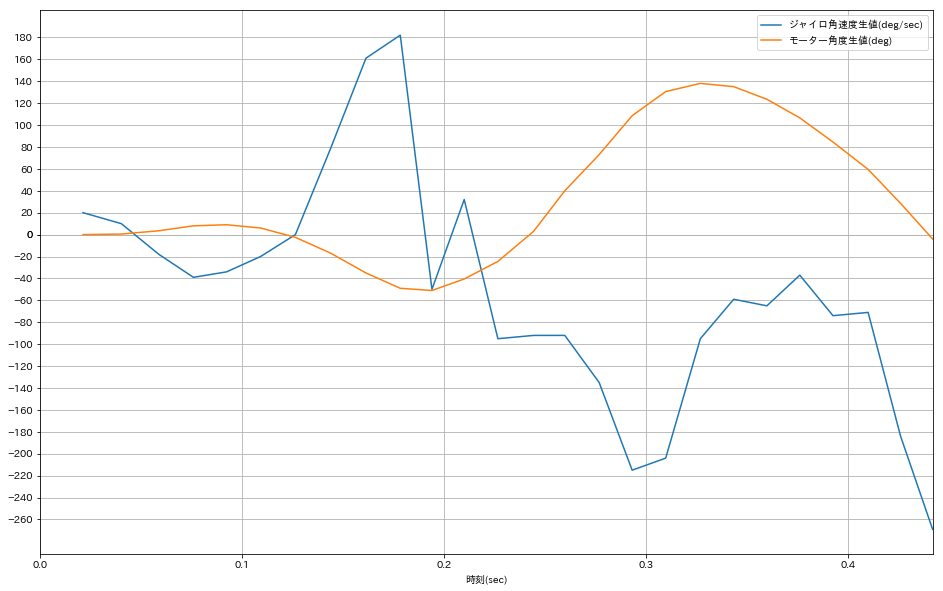

In [5]:
# =======================================================
# ジャイロ角速度生値(deg/sec) と モーター角度生値(deg) のグラフの出力

columns_deg = [
    'ジャイロ角速度生値(deg/sec)',
    'モーター角度生値(deg)',
]
show_plot(df, columns_deg, 20, figsize=(16,10))

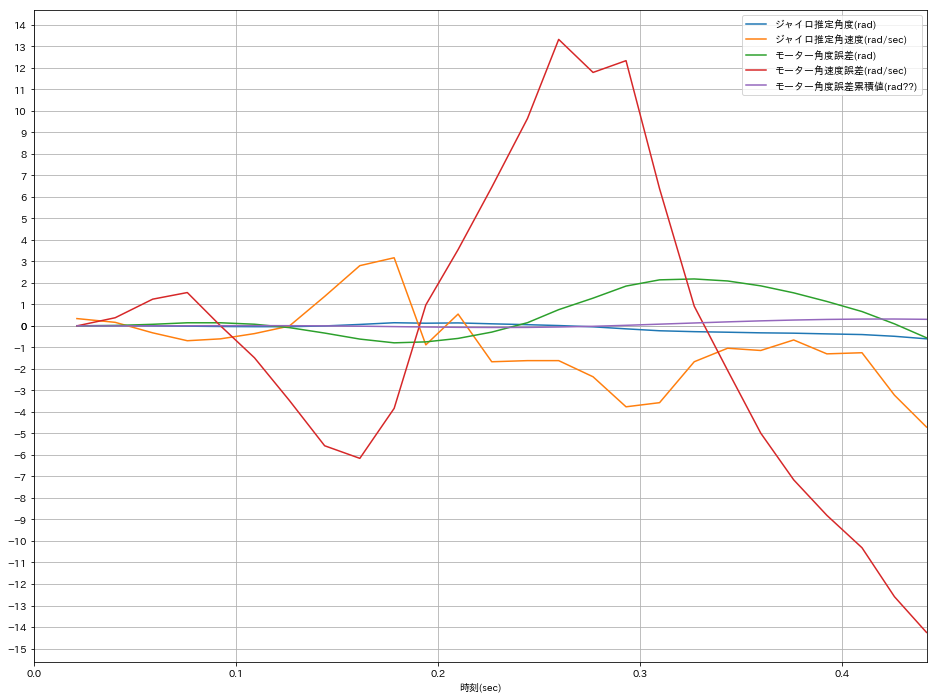

In [6]:
# =======================================================
# 各種推定角度・誤差のグラフ出力

columns_rad = [
    'ジャイロ推定角度(rad)',
    'ジャイロ推定角速度(rad/sec)',
    'モーター角度誤差(rad)',
    'モーター角速度誤差(rad/sec)',
    'モーター角度誤差累積値(rad??)'
]
show_plot(df, columns_rad, 1, figsize=(16,12))

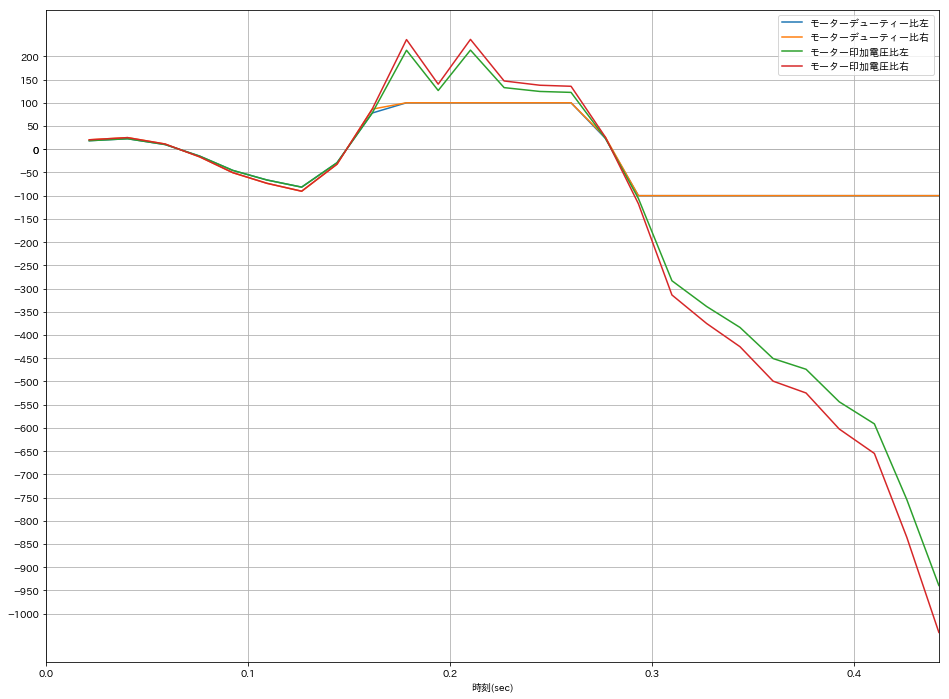

In [9]:
# =======================================================
# 印加電圧比のグラフ出力

columns_vol = [
    'モーターデューティー比左',
    'モーターデューティー比右',
    'モーター印加電圧比左',
    'モーター印加電圧比右'
]
show_plot(df, columns_vol, 50, figsize=(16,12)) #, start=0.1, end=0.3)

In [8]:
import matplotlib as mpl
mpl.matplotlib_fname()
mpl.get_configdir()

'/Users/yoshinori/.matplotlib'